In [1]:
from __future__ import print_function, division
import datetime
import time
import pandas as pd
import amipy
import quant_iq as iq
from quant_iq import Leverage

class Context(object):
    ''' backtest context '''
    def __init__(self):
        self.symbol = ''
        self.dbase = 'LCAP500'
        self.starting_equity = 1000000.00  #per symbol
        self.margin_required = 0 
        self.tick_size = 0.01
        self.tick_value = 0.01
        self.risk = 1.
        self.warmup_bars = 500
        self.commission = 0.005

Backtest finished in 76.51330995559692 seconds.



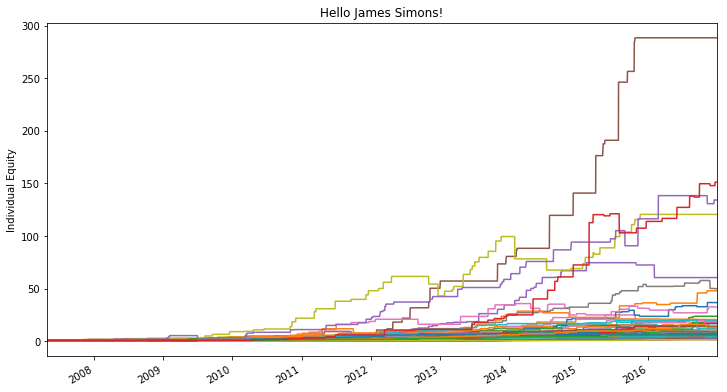

In [2]:
ptimer = time.time()
START_DATE = datetime.datetime(2007, 5, 1)
END_DATE = datetime.datetime(2016, 12, 31)

OBJ = Context()

STRAT = Leverage(OBJ)
portfolio, margin = STRAT.Run(START_DATE, END_DATE)

print('Backtest finished in ' + str(time.time()-ptimer) + ' seconds.\n')

portfolio1 = portfolio.fillna(method='ffill').fillna(method='bfill')
amipy._plot(portfolio1/portfolio1.iloc[0], ylabel='Individual Equity',
            legend=False, title='Hello James Simons!')

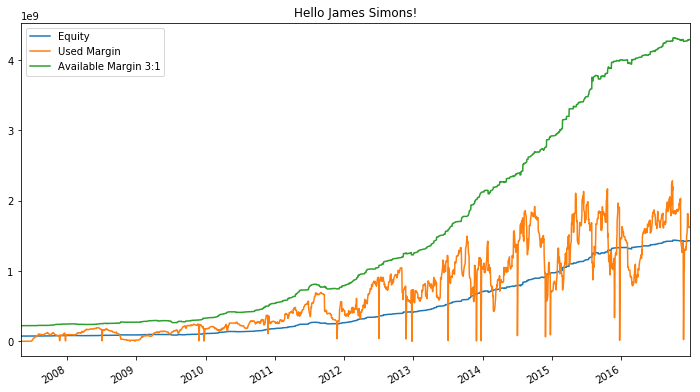



Stats for Total from 2007-05-01 00:00:00 - 2016-12-30 00:00:00
Annual risk-free rate considered: 0.25%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
1833.57%            4.21  35.85%  -10.84%

Annualized Returns:
mtd    3m      6m     ytd    1y     3y      5y      10y     incep.
-----  ------  -----  -----  -----  ------  ------  ------  --------
0.57%  -0.52%  3.78%  7.19%  7.19%  26.44%  40.17%  35.85%  35.85%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  4.21     2.90       1.69
mean    30.93%   31.88%     39.14%
vol     7.29%    10.89%     22.98%
skew    2.95     0.25       -0.07
kurt    25.27    0.67       -1.17
best    4.61%    12.09%     72.59%
worst   -3.29%   -7.54%     7.19%

Drawdowns:
max        max # days  avg       avg # days
-------  ------------  ------  ------------
-10.84%           181  -0.61%         14.33

Misc:
---------------  -------
avg. up month    3.51%
av

In [3]:
mars = margin.fillna(value=0)
tot = mars.sum(axis=1).resample('1D').last()
tot.name = 'mars'
ptotal = pd.DataFrame(portfolio1.sum(axis=1), index=portfolio1.index)
rel_margin = ptotal.join(tot)
rel_margin.columns = ['Equity', 'Used Margin']
rel_margin = rel_margin.join(pd.Series(rel_margin.Equity*3, name='Available Margin 3:1'))
amipy._plot(rel_margin, legend=True, title='Hello James Simons!')

amipy.analyze_portfolio_ffn(portfolio1, 0.0025)

In [5]:
SPY = iq.mongo_grab('SPY', 'YAHOO', START_DATE, END_DATE)
portfolio2 = pd.DataFrame(index=SPY.index)
spdrs = ['XLY', 'XLK', 'XLV', 'XLP']
for spdr in spdrs:
    mdata = iq.mongo_grab(spdr, 'YAHOO', START_DATE, END_DATE)
    portfolio2 = portfolio2.join(mdata)

stats = amipy.analyze_portfolio(portfolio1, 0.0025, False)

print('\n vs 4 sector [XLK, XLP, XLV, XLY] buy and hold portfolio')
stats = amipy.analyze_portfolio(portfolio2, 0.0025, False)



Starting Portfolio Equity: 74000000.0
Final Portfolio Equity: 1430841275.97
Total return: 1833.57% 
Daily return: 0.12% 
Risk: 0.46% 
Sharpe: 4.21 
Sortino: 7.61 
CAGR: 35.85% 
Max drawdown: -10.84% 

 vs 4 sector [XLK, XLP, XLV, XLY] buy and hold portfolio


Starting Portfolio Equity: 105.145964
Final Portfolio Equity: 248.356694
Total return: 136.20% 
Daily return: 0.04% 
Risk: 1.09% 
Sharpe: 0.59 
Sortino: 0.75 
CAGR: 9.30% 
Max drawdown: -44.76% 


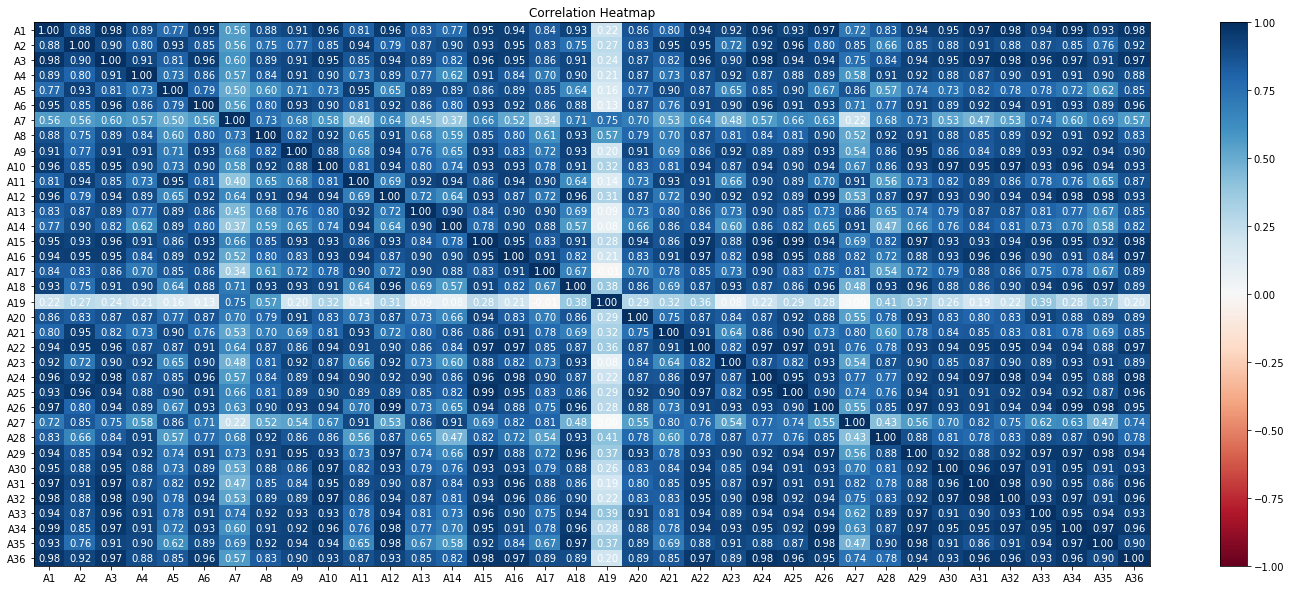

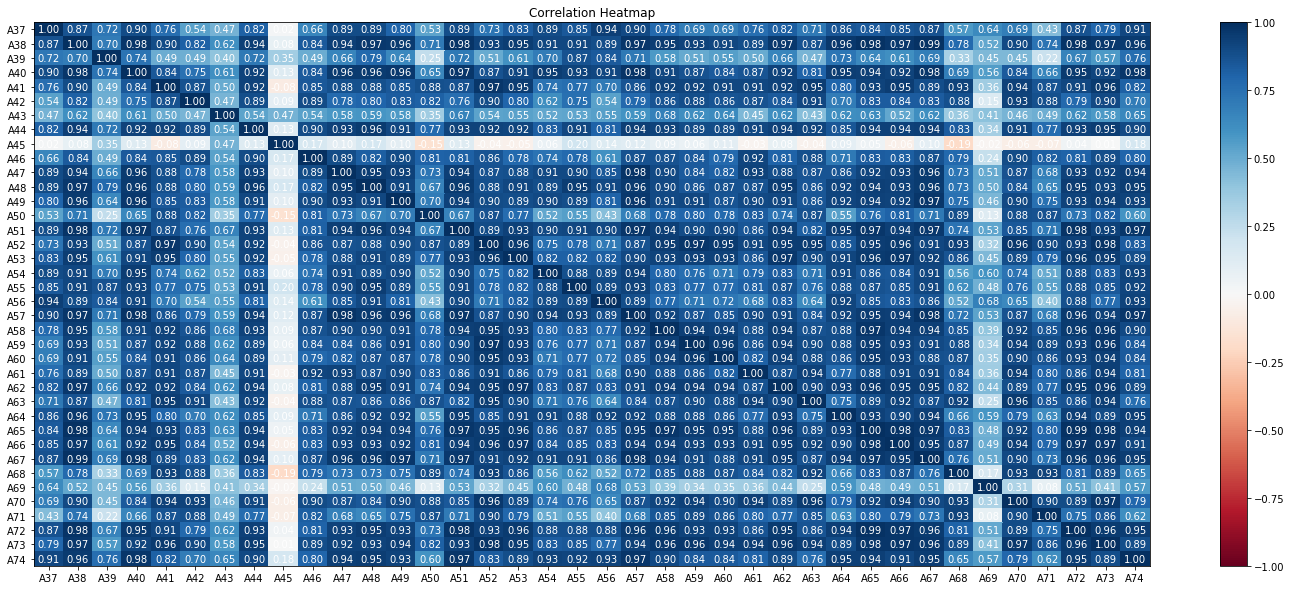

In [6]:
ptwo = portfolio1/portfolio1.iloc[0]
ptwo.columns = ['A'+str(x) for x in range(1, len(ptwo.columns)+1)]
fhalf = ptwo.iloc[:, :36]
shalf = ptwo.iloc[:, 36:]
fheat = fhalf.plot_corr_heatmap(title='Correlation Heatmap', figsize=(25,10))
sheat = shalf.plot_corr_heatmap(title='Correlation Heatmap', figsize=(25,10))